In [183]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

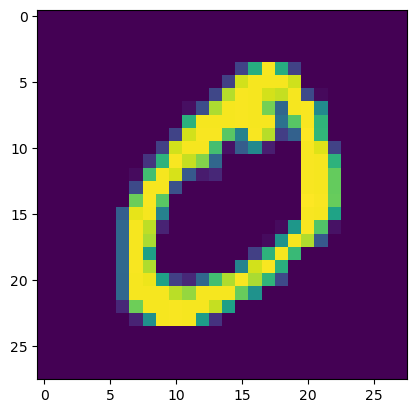

In [15]:
plt.imshow(mnist.load_data()[0][0][1])

In [20]:
len(mnist.load_data()[0][0]),len(mnist.load_data()[0][1]),len(mnist.load_data()[1][0]),len(mnist.load_data()[1][1])

(60000, 60000, 10000, 10000)

In [184]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [186]:
X_train = x_train.reshape(60000, 28*28)
X_test = x_test.reshape(10000, 28*28)

In [187]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [188]:
from tensorflow.keras.utils import to_categorical
print(y_train.shape, y_test.shape)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
print(y_train.shape, y_test.shape)

(60000,) (10000,)
(60000, 10) (10000, 10)


In [25]:
mnist.load_data()[0][1][1]

0

In [27]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Input

model = Sequential()
#입력층
model.add(Input(shape=(784,)))
#은닉층1
model.add(Dense(512))
model.add(Activation('relu'))
#은닉층2
model.add(Dense(256))
model.add(Activation('relu'))
#출력층
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_34 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_35 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │         2,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_36 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [190]:
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy,categorical_accuracy
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss=categorical_crossentropy , optimizer=Adam())

In [191]:
model.fit(X_train, y_train, batch_size=256, epochs=20, verbose=1)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5202
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1078
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0641
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0410
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0305
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0256
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0150
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0138
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0108
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0093
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0065
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0067
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0046
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0106
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/

In [192]:
model.save('mnist.h5')

In [75]:
score = model.evaluate(X_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.9749 - categorical_accuracy_1: 0.9749 - loss: 0.0847
Test score: 0.07220509648323059
Test accuracy: 0.9782000184059143


In [48]:
np.argmax(model.predict(X_test)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


7

In [51]:
predicted_classes[1] == mnist.load_data()[1][1][1]

True

In [76]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == mnist.load_data()[1][1])[0]
incorrect_indices = np.nonzero(predicted_classes != mnist.load_data()[1][1])[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


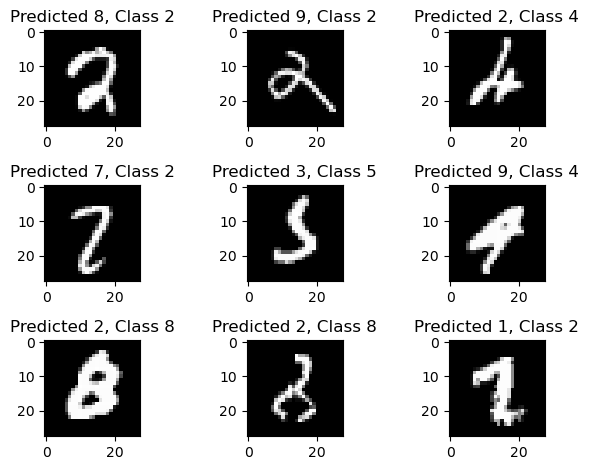

In [77]:
plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = incorrect_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], mnist.load_data()[1][1][correct]))
plt.tight_layout()

In [78]:
X=np.array([-50,-40,-30,-20,-10,0,10,20,30,40,50])
y=np.array([0,0,0,0,0,0,1,1,1,1,1])

In [80]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import BinaryAccuracy
model=Sequential()
model.add(Input(shape=(1,)))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss=BinaryCrossentropy, optimizer=SGD(), metrics=[BinaryAccuracy])

In [81]:
model.fit(X,y,epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - binary_accuracy: 1.0000 - loss: 0.0630
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - binary_accuracy: 1.0000 - loss: 0.0630
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - binary_accuracy: 1.0000 - loss: 0.0630
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - binary_accuracy: 1.0000 - loss: 0.0630
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - binary_accuracy: 1.0000 - loss: 0.0629
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - binary_accuracy: 1.0000 - loss: 0.0629
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - binary_accuracy: 1.0000 - loss: 0.0629
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - binary_accuracy: 1.0000 - loss: 0.0629
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - binary_accuracy: 1.0000 - loss: 0.0628
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - binary_accuracy: 1.0000 - loss: 0.0628
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - binary_accuracy: 1.0000 - loss: 

In [101]:
np.set_printoptions(suppress=True)
for su in model.predict(np.array([11,-12,-130,14,13.5])):
    print('{}'.format(su[0]))
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1.0
2.652112085499425e-09
0.0
1.0
1.0


In [123]:
from sklearn.datasets import load_iris

In [143]:
iris=load_iris()

In [144]:
X=iris.data
y=iris.target

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [146]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [147]:
from tensorflow.keras import Sequential
model=Sequential()
model.add(Input(shape=(4,)))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss=categorical_crossentropy , optimizer=Adam(), metrics=[categorical_accuracy])

In [148]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - categorical_accuracy: 0.3164 - loss: 2.2722  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3603 - loss: 1.6198
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.6180 - loss: 1.3908
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.6802 - loss: 1.0727
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - categorical_accuracy: 0.2821 - loss: 1.0169
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.3180 - loss: 1.0063
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - categorical_accuracy: 0.3539 - loss: 0.9359
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.5225 - loss: 0.8850
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.6478 - loss: 0.8373
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.6391 - loss: 0.7865


In [157]:
#model.save('iris_tensor.h5')
import tensorflow.saved_model as sm
sm.save(model,'save_model/iris_model')

INFO:tensorflow:Assets written to: save_model/iris_model\assets


INFO:tensorflow:Assets written to: save_model/iris_model\assets


In [166]:
#from tensorflow.keras.models import load_model
#new_model = load_model('iris_tensor.h5')
new_model = sm.load('save_model/iris_model')

ModuleNotFoundError: No module named 'tensorflow.saved_model.load'

In [162]:
new_model.evaluate(X_test, y_test)

AttributeError: '_UserObject' object has no attribute 'evaluate'

In [141]:
np.argmax( new_model.predict(X_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0], dtype=int64)

In [142]:
np.argmax(y_test,axis=1)

array([1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 2, 1, 2, 0], dtype=int64)